In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

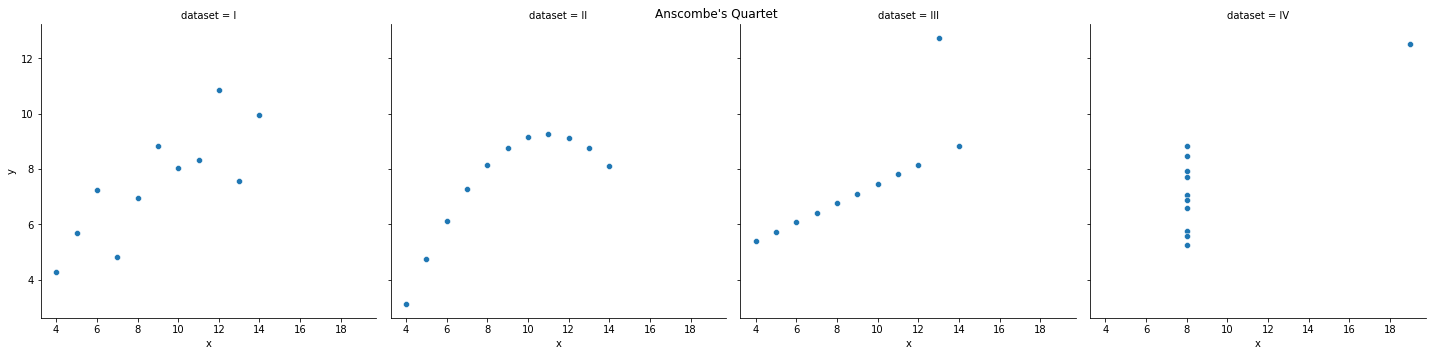

In [2]:
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

sns.relplot(x='x', y='y', col='dataset', data=df).fig.suptitle("Anscombe's Quartet")
df.groupby("dataset").describe()

1. Using lemonade.csv dataset and focusing on continuous variables:
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    '''
    Gets the upper and lower bounds of a series based on the InterQuartile Range and a multiplier. Default multiplier is 1.5
    '''
    q1, q3 = series.quantile([.25, .75])
    iqr = q3 - q1
    
# figure this part out if it's possible
    lower = series.name+'_lower_bound'
    upper = series.name+'_upper_bound'
    print(lower)
    print(upper)
    
    lower = q1 - (multiplier * iqr)
    upper = q3 + (multiplier * iqr)
    print(f'{series.name}\'s Upper bound is {round(lower, 1)}, and Lower bound is {round(upper, 1)}')
    return lower, upper

In [4]:
# url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
csv = "/Users/ultimate/codeup-data-science/anomaly-detection-exercises/lemonade.csv"
df = pd.read_csv(csv)
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [5]:
df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

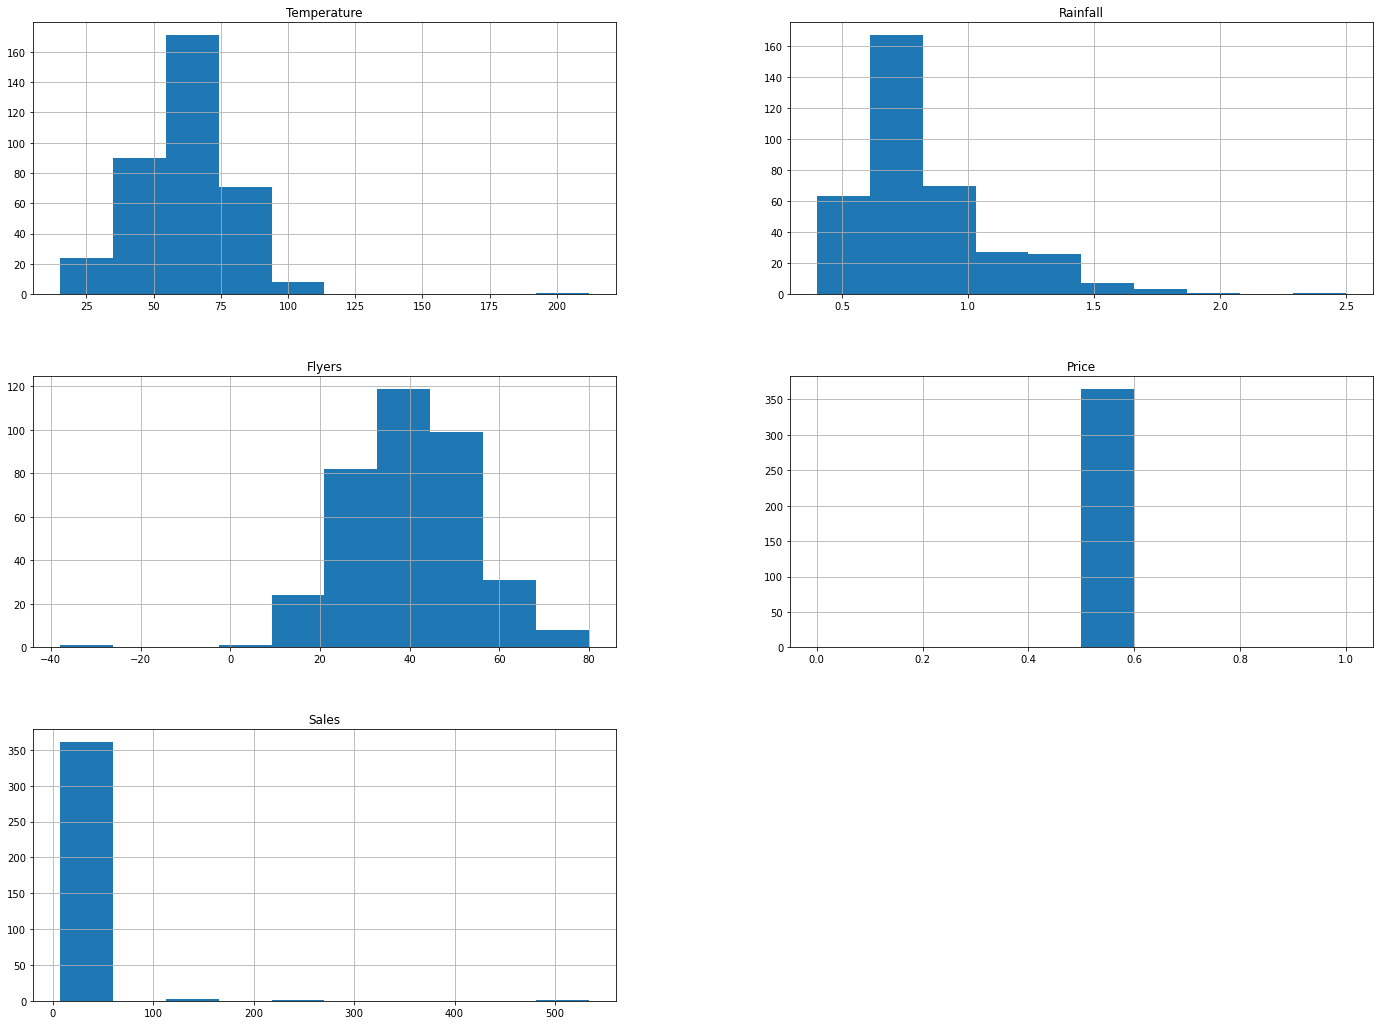

In [6]:
df.hist(figsize=(24, 18))
plt.show()

In [7]:
Temperature = df.Temperature
Rainfall = df.Rainfall
Flyers = df.Flyers
Price = df.Price
Sales = df.Sales

# Calculate the z-score 
zscores = pd.Series((Temperature - Temperature.mean()) / Temperature.std())

# Finds all of the observations two standard deviations or more.
Temperature[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
Temperature[zscores.abs() >= 3]


41    212.0
Name: Temperature, dtype: float64

In [8]:
get_lower_and_upper_bounds(Temperature), get_lower_and_upper_bounds(Rainfall), get_lower_and_upper_bounds(Flyers), get_lower_and_upper_bounds(Price), get_lower_and_upper_bounds(Sales)

Temperature_lower_bound
Temperature_upper_bound
Temperature's Upper bound is 16.7, and Lower bound is 104.7
Rainfall_lower_bound
Rainfall_upper_bound
Rainfall's Upper bound is 0.3, and Lower bound is 1.3
Flyers_lower_bound
Flyers_upper_bound
Flyers's Upper bound is 4.0, and Lower bound is 76.0
Price_lower_bound
Price_upper_bound
Price's Upper bound is 0.5, and Lower bound is 0.5
Sales_lower_bound
Sales_upper_bound
Sales's Upper bound is 5.0, and Lower bound is 45.0


((16.700000000000003, 104.7),
 (0.26, 1.3),
 (4.0, 76.0),
 (0.5, 0.5),
 (5.0, 45.0))

Temperature_lower_bound
Temperature_upper_bound
Temperature's Upper bound is 16.7, and Lower bound is 104.7


(16.700000000000003, 104.7)